### Packages

In [1]:
import numpy as np
from hcipy import *
import matplotlib.pyplot as plt
import os

%matplotlib inline
# %matplotlib notebook

#Import functions
from Functions import *

In [2]:
os.chdir('N-telescope-interferometer')

## 2. The N-telescope interferometer

Set the wavelength @1$\mu$m.\
Set the diameter of the mirrors $D = 1$m separated by a distance $B = 2-50D$.\
Set the focal length to $10$m.\
Set the rotation angle to $0$rad.

In [3]:
wl = 1e-6 # m
D = 1 # m
B = 12 # m
f = 50 # m
rot_angle = 0. # rad

In [4]:
cmap=plt.cm.Blues
# cmap='inferno'

In [5]:
# Load the mirrors position (in polar coordinates)
tel_coord_polar = np.loadtxt('7TelescopesInterferometerCoord2D.dat')
tel_coord_polar

array([[0.       , 0.       ],
       [2.       , 0.       ],
       [6.       , 0.       ],
       [2.       , 2.0943951],
       [6.       , 2.0943951],
       [2.       , 4.1887902],
       [6.       , 4.1887902]])

In [6]:
# Transform the polar coordinates to cartesian coordinates
x, y = pol2cart(tel_coord_polar[:,0],tel_coord_polar[:,1])

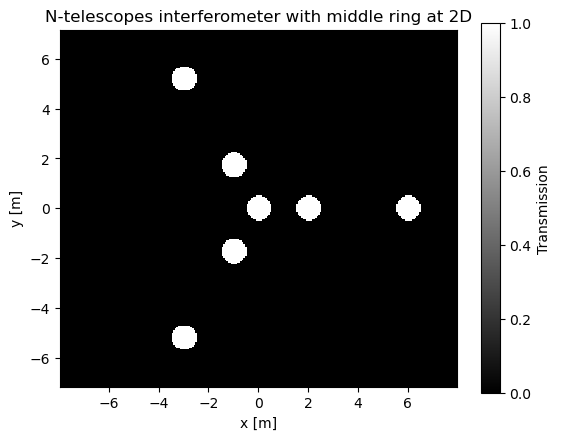

In [7]:
# Generate the field and the pupil
field, pupil_grid = Interferometer(x,y,D,rot_angle)

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'N-telescopes interferometer with middle ring at 2D')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')

plt.savefig('N_telescopes_interferometer.png')

#### Compute the PSF and OTF of this new instrument

$\underline{\text{Interpretation:}}$

In the middle we can see a ring of 7 "apertures" because we have a 7 telescopes interferometer.
We can also see that it has a peculiar shape due to the interferometer shape (it's not consecutive perfect rings)

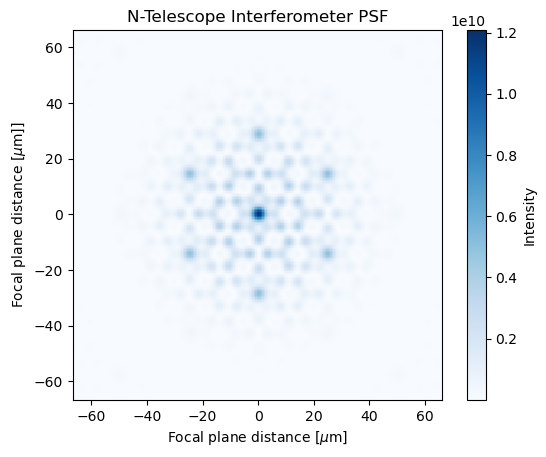

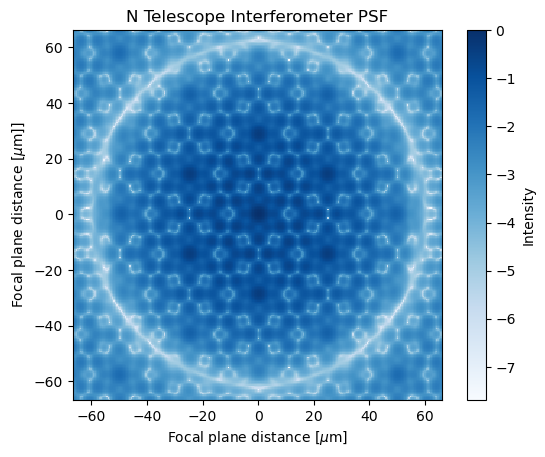

In [8]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)

# Plot the PSF
imshow_field(focal_image.intensity,
             grid=focal_grid, vmin=np.min(focal_image.intensity), cmap=cmap, grid_units=1e-6)

plt.title(r'N-Telescope Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Focal plane distance [$\mu$m]]')
plt.colorbar(label=r'Intensity')
plt.show()

# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
log_field = np.log10(focal_image.intensity / focal_image.intensity.max())
imshow_field(log_field, grid=focal_grid, vmin= np.min(log_field), cmap=cmap, grid_units=1e-6)

plt.title(r'N Telescope Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Focal plane distance [$\mu$m]]')
plt.colorbar(label=r'Intensity')
plt.savefig('N_telescopes_interferometer_PSF.png')
plt.show()

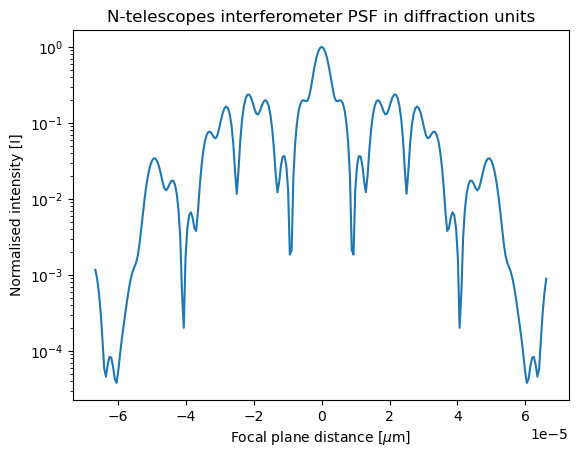

In [9]:
psf = focal_image.intensity
psf_shape = psf.grid.shape

slicefoc = psf.shaped[psf_shape[0] // 2, :]
slicefoc_normalised = slicefoc / psf.max()

# Plot a horizontal cut of the PSF
plt.plot(focal_grid.x.reshape(psf_shape)[0, :], slicefoc_normalised)
plt.title(r'N-telescopes interferometer PSF in diffraction units')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Normalised intensity [I]')
plt.yscale('log')

plt.savefig('N_telescopes_interferometer_PSF_diff.png')

$\underline{\text{Interpretation:}}$

We see the strength at which the frequencies are measured.

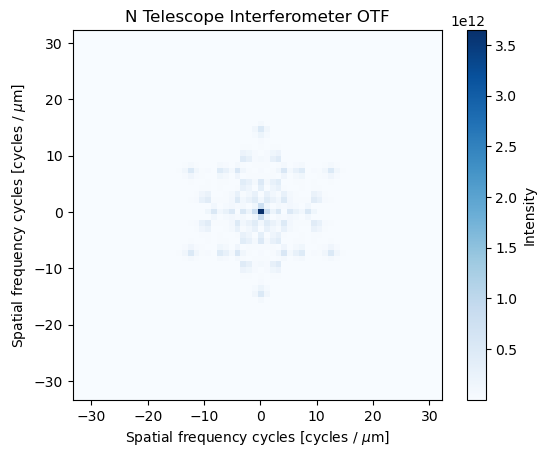

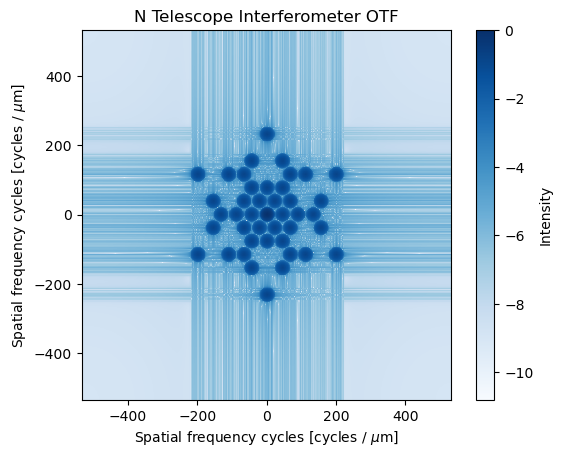

In [10]:
# Get the real part of the OTF
real_otf, focal_grid = Get_OTF(field, wl, f, B)
# Plot the OTF
imshow_field(real_otf, grid=focal_grid, cmap=cmap, grid_units=1e-6)

plt.title(r'N Telescope Interferometer OTF')
plt.xlabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.ylabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.colorbar(label=r'Intensity')
plt.show()

# Get the real part of the OTF
real_otf, focal_grid = Get_OTF(field, wl, f, B/4, q=16, num_airy=32)
# Plot the OTF
imshow_field(np.log10(real_otf/np.max(real_otf)), grid=focal_grid, cmap=cmap, grid_units=1e-6)

plt.title(r'N Telescope Interferometer OTF')
plt.xlabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.ylabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.colorbar(label=r'Intensity')
plt.savefig('N_telescopes_interferometer_OTF.png')

#### What happens if the middle ring of telescope is placed at a distance of 3D

In [11]:
# Load the mirrors position for the middle ring at 3D (in polar coordinates)
tel_coord_polar = np.loadtxt('7TelescopesInterferometerCoord3D.dat')
tel_coord_polar

array([[0.       , 0.       ],
       [3.       , 0.       ],
       [6.       , 0.       ],
       [3.       , 2.0943951],
       [6.       , 2.0943951],
       [3.       , 4.1887902],
       [6.       , 4.1887902]])

In [12]:
# Transform the polar coordinates to cartesian coordinate
x, y = pol2cart(tel_coord_polar[:,0],tel_coord_polar[:,1])

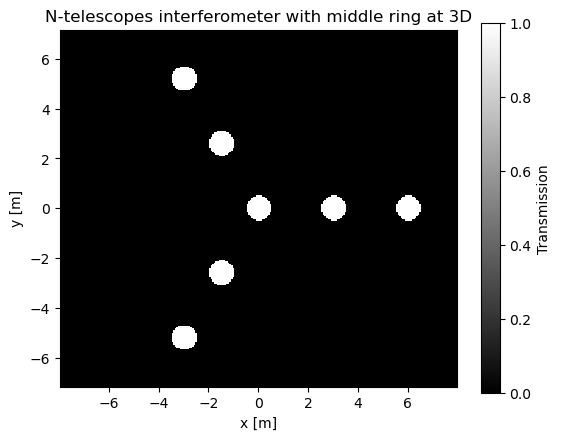

In [13]:
# Generate the field and the pupil
field, pupil_grid = Interferometer(x,y,D,rot_angle)

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'N-telescopes interferometer with middle ring at 3D')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('N_telescopes_interferometer.png')

$\underline{\text{Interpretation:}}$

The PSF has the same main features as the other one but the small features are now different because of the distance change of the middle ring.

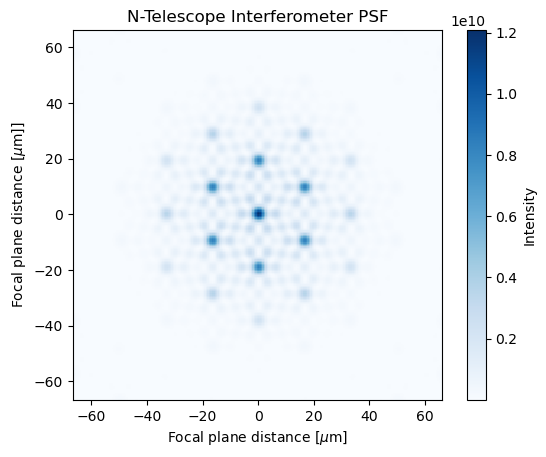

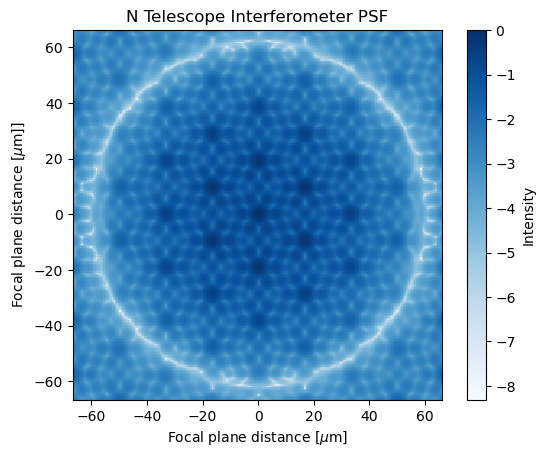

In [14]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)

# Plot the PSF
imshow_field(focal_image.intensity,
             grid=focal_grid, vmin=np.min(focal_image.intensity), cmap=cmap, grid_units=1e-6)

plt.title(r'N-Telescope Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Focal plane distance [$\mu$m]]')
plt.colorbar(label=r'Intensity')
plt.show()

# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
log_field = np.log10(focal_image.intensity / focal_image.intensity.max())
imshow_field(log_field, grid=focal_grid, vmin= np.min(log_field), cmap=cmap, grid_units=1e-6)

plt.title(r'N Telescope Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Focal plane distance [$\mu$m]]')
plt.colorbar(label=r'Intensity')
plt.savefig('N_telescopes_interferometer_PSF.png')
plt.show()

$\underline{\text{Interpretation:}}$

We can see that the OTF is more homogemeously distributed around the center than the previous one but it still has the same star shape

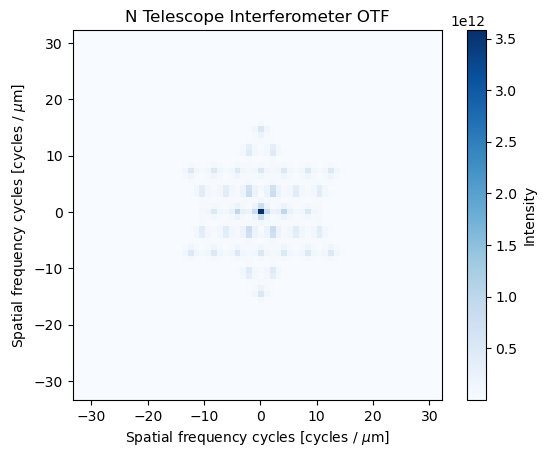

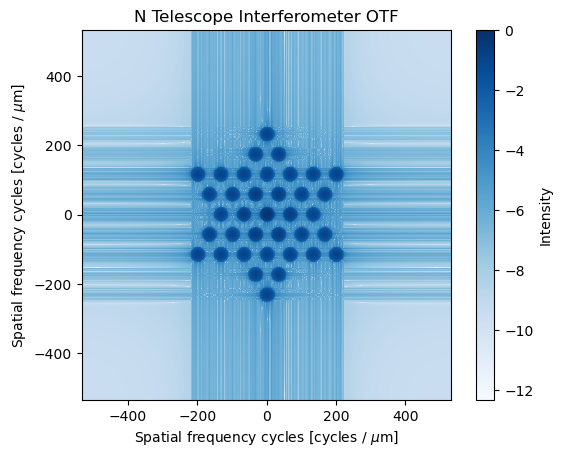

In [15]:
# Get the real part of the OTF
real_otf, focal_grid = Get_OTF(field, wl, f, B)
# Plot the OTF
imshow_field(real_otf, grid=focal_grid, cmap=cmap, grid_units=1e-6)

plt.title(r'N Telescope Interferometer OTF')
plt.xlabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.ylabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.colorbar(label=r'Intensity')
plt.show()

# Get the real part of the OTF
real_otf, focal_grid = Get_OTF(field, wl, f, B/4, q=16, num_airy=32)
# Plot the OTF
imshow_field(np.log10(real_otf/np.max(real_otf)), grid=focal_grid, cmap=cmap, grid_units=1e-6)

plt.title(r'N Telescope Interferometer OTF')
plt.xlabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.ylabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.colorbar(label=r'Intensity')
plt.savefig('N_telescopes_interferometer_OTF.png')

#### What happens if you rotate the interferometer around the central telescope?

$\underline{\text{Should we rotate around a particular telescope:}}$

The center one, in order to have a homogemeous cover of the area.
But it doesn't looks like it changes anything about the PSF or OTF

In [16]:
# Load the mirrors position for the middle ring at 2D (in polar coordinates)
tel_coord_polar = np.loadtxt('7TelescopesInterferometerCoord2D.dat')
tel_coord_polar

array([[0.       , 0.       ],
       [2.       , 0.       ],
       [6.       , 0.       ],
       [2.       , 2.0943951],
       [6.       , 2.0943951],
       [2.       , 4.1887902],
       [6.       , 4.1887902]])

In [17]:
# Transform the polar coordinates to cartseian coordinates
x, y = pol2cart(tel_coord_polar[:,0],tel_coord_polar[:,1])

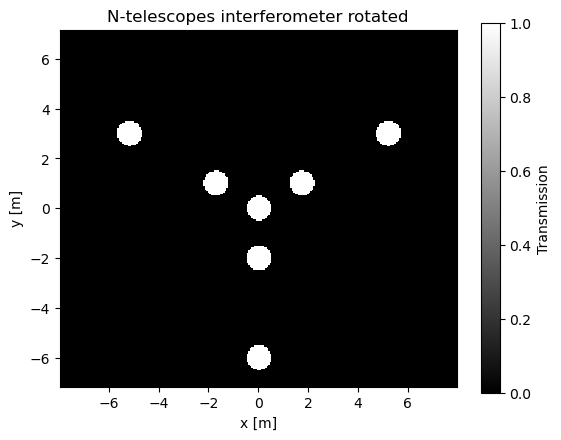

In [18]:
# Rotate the telescpe of 30deg
rot_angle = np.pi/6. # rad

# Generate the field and the pupil
field, pupil_grid = Interferometer(x,y,D,rot_angle)

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'N-telescopes interferometer rotated')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')

plt.savefig('N_telescopes_interferometer.png')

$\underline{\text{Interpretation:}}$

The pattern (especially in the center) is different

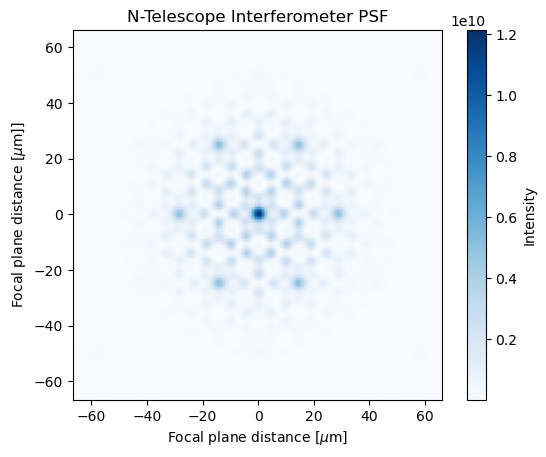

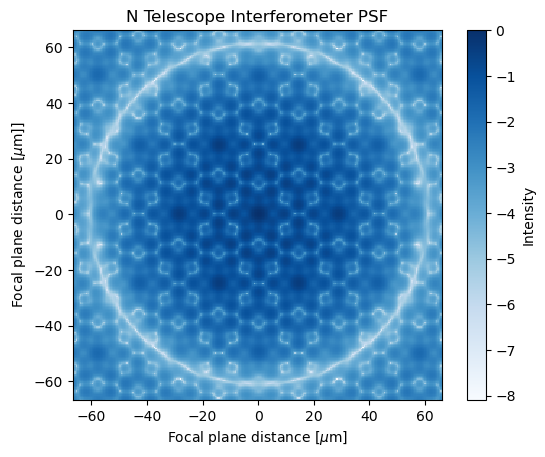

In [19]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)

# Plot the PSF
imshow_field(focal_image.intensity,
             grid=focal_grid, vmin=np.min(focal_image.intensity), cmap=cmap, grid_units=1e-6)

plt.title(r'N-Telescope Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Focal plane distance [$\mu$m]]')
plt.colorbar(label=r'Intensity')
plt.show()

# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
log_field = np.log10(focal_image.intensity / focal_image.intensity.max())
imshow_field(log_field, grid=focal_grid, vmin= np.min(log_field), cmap=cmap, grid_units=1e-6)

plt.title(r'N Telescope Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Focal plane distance [$\mu$m]]')
plt.colorbar(label=r'Intensity')
plt.savefig('N_telescopes_interferometer_PSF.png')
plt.show()

$\underline{\text{Interpretation:}}$

It's a rotated version of the previous OTF, which is expected.

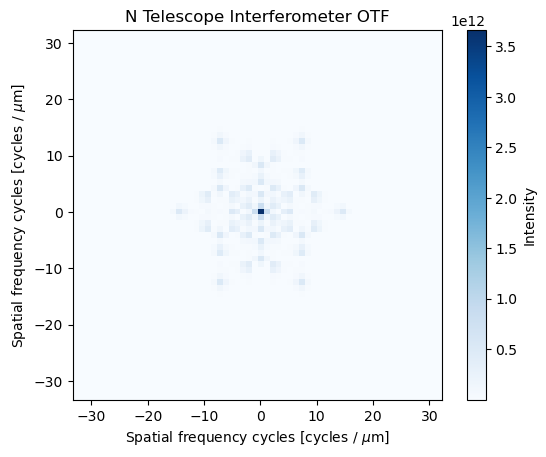

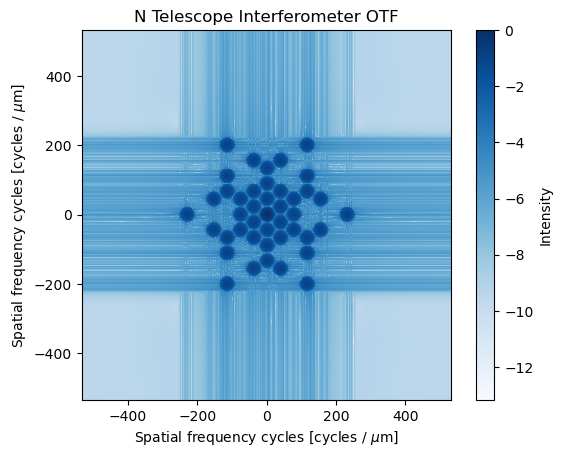

In [20]:
# Get the real part of the OTF
real_otf, focal_grid = Get_OTF(field, wl, f, B)
# Plot the OTF
imshow_field(real_otf, grid=focal_grid, cmap=cmap, grid_units=1e-6)

plt.title(r'N Telescope Interferometer OTF')
plt.xlabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.ylabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.colorbar(label=r'Intensity')
plt.show()

# Get the real part of the OTF
real_otf, focal_grid = Get_OTF(field, wl, f, B/4, q=16, num_airy=32)
# Plot the OTF
imshow_field(np.log10(real_otf/np.max(real_otf)), grid=focal_grid, cmap=cmap, grid_units=1e-6)

plt.title(r'N Telescope Interferometer OTF')
plt.xlabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.ylabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.colorbar(label=r'Intensity')
plt.savefig('N_telescopes_interferometer_OTF.png')

#### Compute PSF and OTF of single aperture telescopes of diameter 6D & 12D.

$\underline{\text{Comparison with the interferometer:}}$

The PSF and OTF are much simpler and have their intensity concentrated in the middle, and higher by one order of magnitude.
They are a perfect interferometer.

$\underline{\text{What type of interferometer is a single aperture telescope:}}$


$\underline{\text{6D telescope:}}$

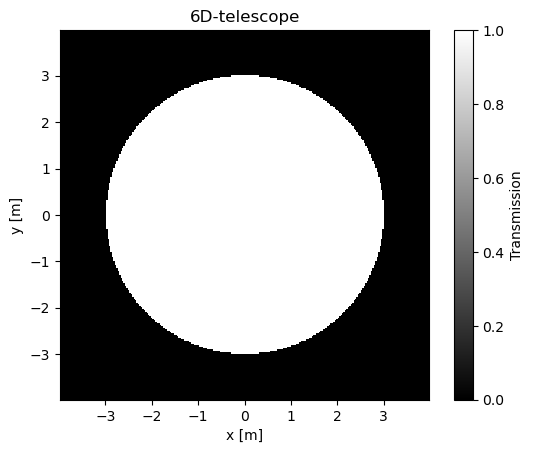

In [25]:
# Define the size of the mirror
D = 6 # m
B = D

# Create the pupil of a single aperture telescope
telescope_pupil, pupil_grid = Make_Single_Aperture(D)

# Plot the field of the mirrors
im = imshow_field(telescope_pupil, pupil_grid, cmap='gray')
plt.title(r'6D-telescope')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('6D_Telescope.png')
plt.show()

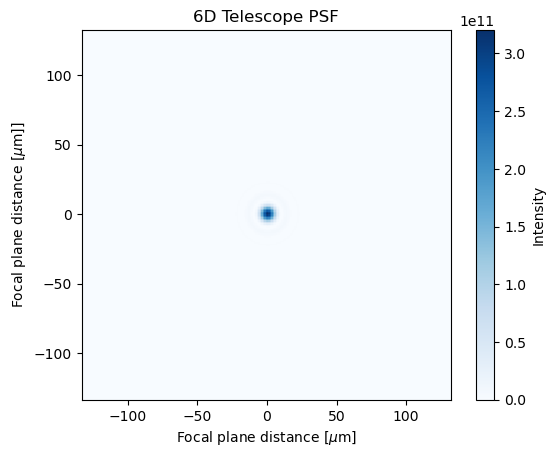

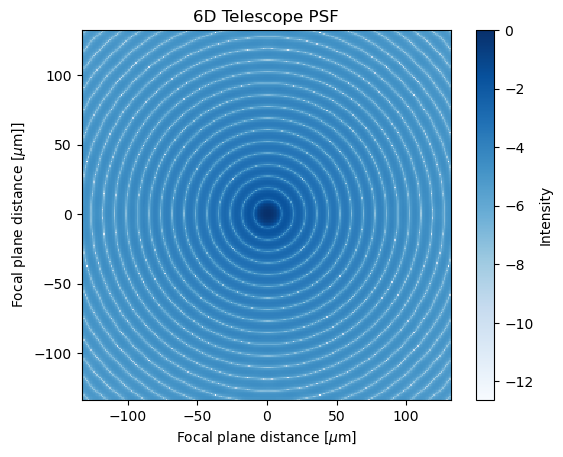

In [22]:
# Get the PSF
focal_image, focal_grid = Get_PSF(telescope_pupil, wl, f, B)

# Plot the PSF
imshow_field(focal_image.intensity,
             grid=focal_grid, vmin=np.min(focal_image.intensity), cmap=cmap, grid_units=1e-6)

plt.title(r'6D Telescope PSF')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Focal plane distance [$\mu$m]]')
plt.colorbar(label=r'Intensity')
plt.show()

# Get the PSF
focal_image, focal_grid = Get_PSF(telescope_pupil, wl, f, B)
# Plot the PSF
log_field = np.log10(focal_image.intensity / focal_image.intensity.max())
imshow_field(log_field, grid=focal_grid, vmin= np.min(log_field), cmap=cmap, grid_units=1e-6)

plt.title(r'6D Telescope PSF')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Focal plane distance [$\mu$m]]')
plt.colorbar(label=r'Intensity')
plt.savefig('6D_telescope_PSF.png')
plt.show()

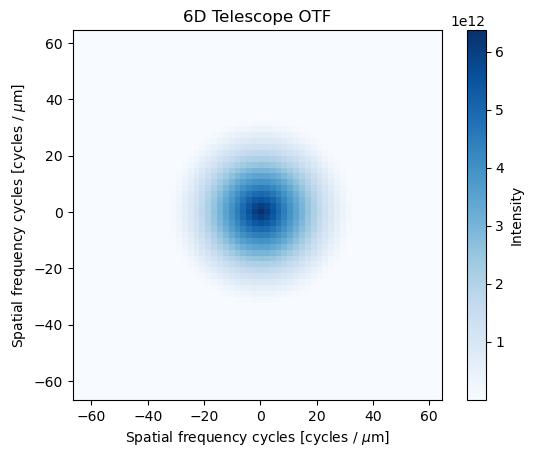

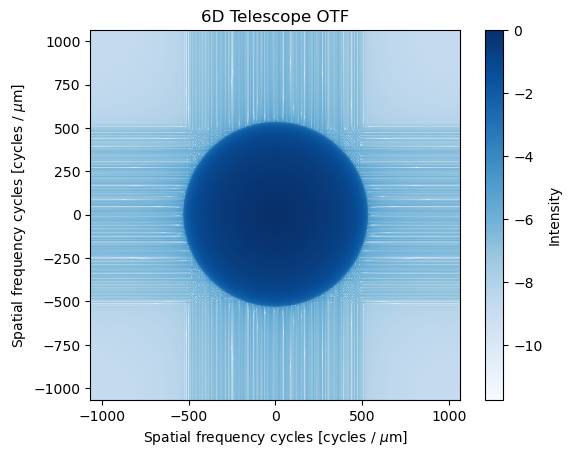

In [23]:
# Get the real part of the OTF
real_otf, focal_grid = Get_OTF(telescope_pupil, wl, f, B)
# Plot the OTF
imshow_field(real_otf, grid=focal_grid, cmap=cmap, grid_units=1e-6)

plt.title(r'6D Telescope OTF')
plt.xlabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.ylabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.colorbar(label=r'Intensity')
plt.show()

# Get the real part of the OTF
real_otf, focal_grid = Get_OTF(telescope_pupil, wl, f, B/4, q=16, num_airy=32)
# Plot the OTF
imshow_field(np.log10(real_otf/np.max(real_otf)), grid=focal_grid, cmap=cmap, grid_units=1e-6)

plt.title(r'6D Telescope OTF')
plt.xlabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.ylabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.colorbar(label=r'Intensity')
plt.savefig('6D_telescope_OTF.png')

$\underline{\text{12D telescope:}}$

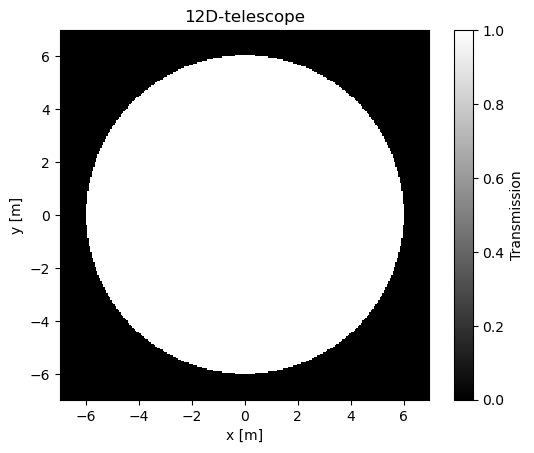

In [26]:
# Define the size of the mirror
D = 12 # m
B = D

# Create the pupil of a single aperture telescope
telescope_pupil, pupil_grid = Make_Single_Aperture(D)

# Plot the field of the mirrors
im = imshow_field(telescope_pupil, pupil_grid, cmap='gray')
plt.title(r'12D-telescope')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('12D_Telescope.png')
plt.show()

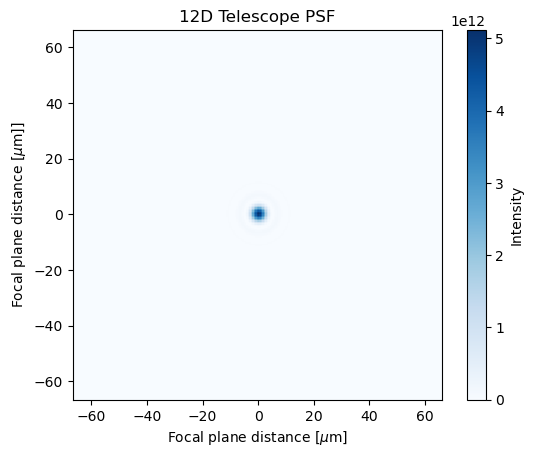

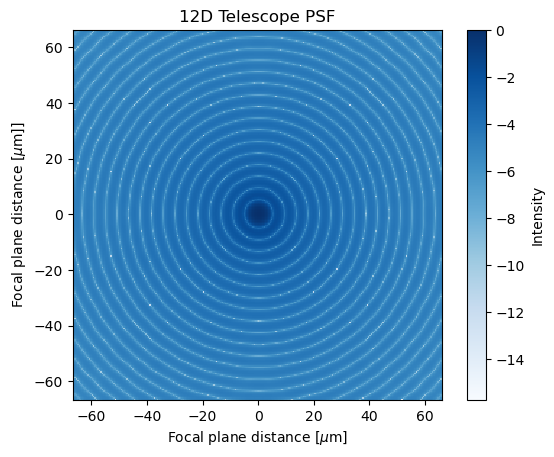

In [27]:
# Get the PSF
focal_image, focal_grid = Get_PSF(telescope_pupil, wl, f, B)

# Plot the PSF
imshow_field(focal_image.intensity,
             grid=focal_grid, vmin=np.min(focal_image.intensity), cmap=cmap, grid_units=1e-6)

plt.title(r'12D Telescope PSF')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Focal plane distance [$\mu$m]]')
plt.colorbar(label=r'Intensity')
plt.show()

# Get the PSF
focal_image, focal_grid = Get_PSF(telescope_pupil, wl, f, B)
# Plot the PSF
log_field = np.log10(focal_image.intensity / focal_image.intensity.max())
imshow_field(log_field, grid=focal_grid, vmin= np.min(log_field), cmap=cmap, grid_units=1e-6)

plt.title(r'12D Telescope PSF')
plt.xlabel(r'Focal plane distance [$\mu$m]')
plt.ylabel(r'Focal plane distance [$\mu$m]]')
plt.colorbar(label=r'Intensity')
plt.savefig('12D_telescope_PSF.png')
plt.show()

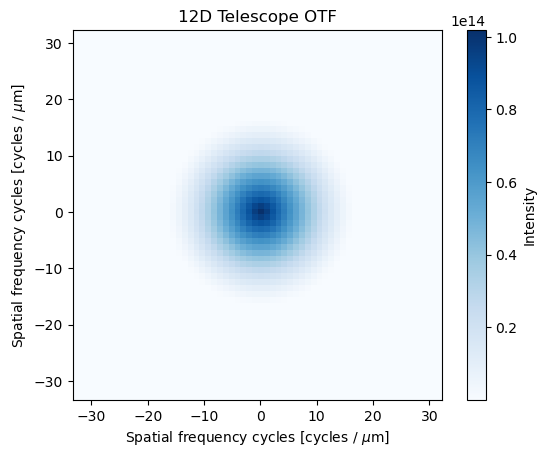

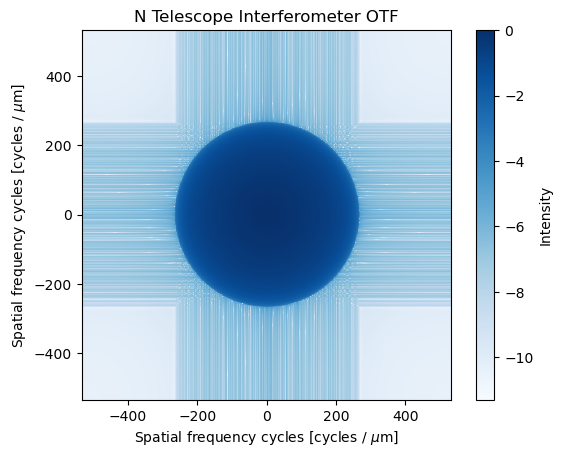

In [28]:
# Get the real part of the OTF
real_otf, focal_grid = Get_OTF(telescope_pupil, wl, f, B)
# Plot the OTF
imshow_field(real_otf, grid=focal_grid, cmap=cmap, grid_units=1e-6)

plt.title(r'12D Telescope OTF')
plt.xlabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.ylabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.colorbar(label=r'Intensity')
plt.show()

# Get the real part of the OTF
real_otf, focal_grid = Get_OTF(telescope_pupil, wl, f, B/4, q=16, num_airy=32)
# Plot the OTF
imshow_field(np.log10(real_otf/np.max(real_otf)), grid=focal_grid, cmap=cmap, grid_units=1e-6)
plt.title(r'12D Telescope OTF')
plt.title(r'N Telescope Interferometer OTF')
plt.xlabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.ylabel(r'Spatial frequency cycles [cycles / $\mu$m]')
plt.colorbar(label=r'Intensity')
plt.savefig('12D_telescope_OTF.png')